In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
import datetime as dt

# Overview of Data

In [2]:
%time
file = 'card transactions.xlsx'
myData = pd.read_excel(file)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.91 µs


In [3]:
myData.shape

(96753, 10)

In [4]:
myData.dtypes

Recnum                        int64
Cardnum                       int64
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                   float64
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

In [5]:
myData.head(5)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [6]:
myData.describe(include = 'all')

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
count,96753.000000,9.675300e+04,96753,93378,96753,95558,92097.000000,96753,9.675300e+04,96753.000000
unique,NaN,NaN,365,13091,13126,227,NaN,4,NaN,NaN
top,NaN,NaN,2010-02-28 00:00:00,930090121224,GSA-FSS-ADV,TN,NaN,P,NaN,NaN
freq,NaN,NaN,684,9310,1688,12035,NaN,96398,NaN,NaN
first,NaN,NaN,2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2010-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,48377.000000,5.142202e+09,NaN,NaN,NaN,NaN,44706.596740,NaN,4.278857e+02,0.010945
std,27930.329635,5.567084e+04,NaN,NaN,NaN,NaN,28369.537945,NaN,1.000614e+04,0.104047
min,1.000000,5.142110e+09,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000e-02,0.000000
25%,24189.000000,5.142152e+09,NaN,NaN,NaN,NaN,20855.000000,NaN,3.348000e+01,0.000000


In [7]:
numrecords = len(myData)
print(numrecords)

96753


In [8]:
myData.count() * 100 /numrecords

Recnum               100.000000
Cardnum              100.000000
Date                 100.000000
Merchnum              96.511736
Merch description    100.000000
Merch state           98.764896
Merch zip             95.187746
Transtype            100.000000
Amount               100.000000
Fraud                100.000000
dtype: float64

# Recnum

In [9]:
attribute = 'Recnum'

In [10]:
myData[attribute].isnull().sum()

0

In [11]:
myData[attribute].value_counts()

2047     1
23198    1
661      1
6806     1
4759     1
27288    1
25241    1
31386    1
29339    1
19100    1
17053    1
21151    1
12947    1
76464    1
74417    1
80562    1
78515    1
68276    1
66229    1
72374    1
70327    1
92856    1
2708     1
14994    1
94971    1
39558    1
82557    1
88702    1
86655    1
43648    1
        ..
34170    1
36219    1
46460    1
48509    1
42366    1
44415    1
3435     1
1386     1
7529     1
5480     1
95556    1
91462    1
93511    1
70984    1
73033    1
66890    1
68939    1
79180    1
81229    1
75086    1
77135    1
21856    1
23905    1
17762    1
19811    1
30052    1
32101    1
25958    1
28007    1
2049     1
Name: Recnum, Length: 96753, dtype: int64

In [12]:
len(myData[attribute].unique())

96753

# Cardnum

In [13]:
attribute = 'Cardnum'

In [14]:
len(myData[attribute].unique())

1645

In [15]:
myData[attribute].value_counts()

5142148452    1192
5142184598     921
5142189108     663
5142297710     583
5142223373     579
5142187452     526
5142299634     515
5142189945     512
5142149691     497
5142190147     488
5142230181     479
5142157720     475
5142152067     473
5142143744     422
5142125684     415
5142259479     411
5142273878     408
5142176897     405
5142132941     400
5142131548     384
5142289869     375
5142260984     366
5142139554     362
5142271065     352
5142146833     349
5142267106     342
5142221571     333
5142142792     324
5142225942     321
5142149874     321
              ... 
5142303638       1
5142152186       1
5142298046       1
5142193886       1
5142229882       1
5142299970       1
5142212903       1
5142171822       1
5142134652       1
5142179269       1
5142118121       1
5142301566       1
5142127059       1
5142164097       1
5142114644       1
5142261640       1
5142309697       1
5142239628       1
5142246010       1
5142282130       1
5142179056       1
5142225132  

In [16]:
myData[myData[attribute] == 0].shape

(0, 10)

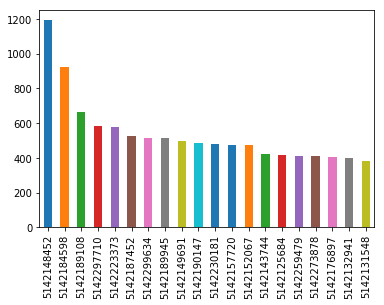

In [17]:
myData[attribute].value_counts().head(20).plot(kind='bar')
plt.savefig('hist.png')

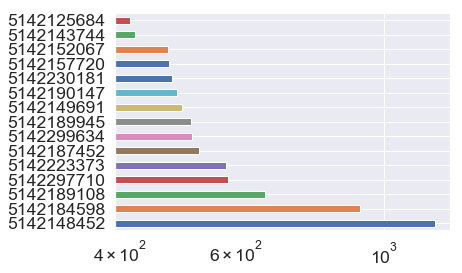

In [19]:
sns.set(font_scale=1.6)
myData[attribute].value_counts().head(15).plot(kind = 'barh')
plt.xscale('log')
plt.savefig('hist.png')

# Date

In [20]:
attribute = 'Date'

In [21]:
myData[attribute].isnull().sum()

0

In [22]:
len(myData[attribute].unique())

365

In [23]:
myData[attribute].value_counts()

2010-02-28    684
2010-08-10    610
2010-03-15    594
2010-09-13    564
2010-08-09    536
2010-09-07    536
2010-09-14    533
2010-09-21    522
2010-08-01    521
2010-08-31    518
2010-08-29    503
2010-09-28    503
2010-02-16    501
2010-09-19    497
2010-09-29    496
2010-02-09    496
2010-08-24    495
2010-06-06    492
2010-09-20    491
2010-06-29    472
2010-08-23    470
2010-05-16    470
2010-07-13    469
2010-03-22    465
2010-08-30    462
2010-07-19    460
2010-09-15    459
2010-08-22    454
2010-08-03    454
2010-05-11    453
             ... 
2010-07-09     27
2010-07-23     26
2010-03-12     26
2010-06-18     26
2010-05-14     25
2010-07-16     24
2010-06-04     24
2010-03-05     22
2010-04-09     21
2010-01-09     19
2010-10-31     19
2010-09-10     19
2010-12-19     18
2010-03-19     18
2010-11-14     18
2010-11-27     18
2010-02-13     18
2010-11-21     17
2010-10-10     16
2010-10-24     16
2010-03-26     14
2010-12-25     14
2010-02-27     13
2010-01-30     13
2010-02-20

In [24]:
myData[myData[attribute] == 0].shape

(0, 10)

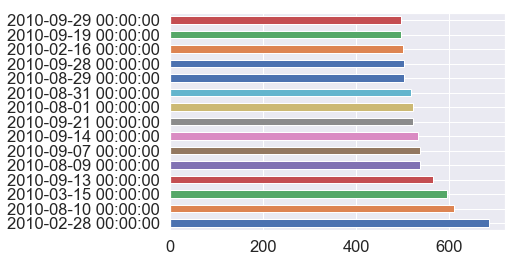

In [26]:
sns.set(font_scale=1.5)
myData[attribute].value_counts().head(15).plot(kind = 'barh')
#plt.yscale()
#plt.xscale('log')
plt.savefig('hist.png')

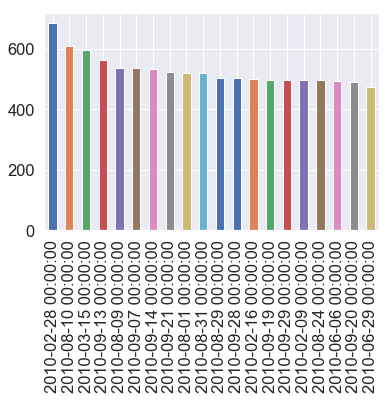

In [179]:
myData[attribute].value_counts().head(20).plot(kind = 'bar')

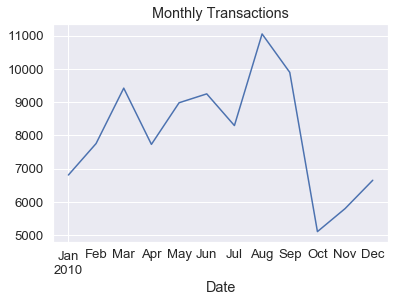

In [28]:
sns.set(font_scale=1.2)
myData.assign(trx = np.ones(numrecords)).set_index(myData['Date']).resample('m')\
    .count().trx.plot(title = 'Monthly Transactions')
plt.savefig('hist.png')

## Below are just tests
---------------------------------------------------------------------------

In [266]:
myData.head(3)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0


In [210]:
test = myData.set_index(myData['Date']).resample('W').sum()
test.head(10)

,Recnum,Cardnum,Merch zip,Amount,Fraud
Date,,,,,
2010-01-03,28680,1228985555257,9074991.0,73943.29,3
2010-01-10,1702050,8335507715038,69077764.0,612470.46,5
2010-01-17,5001885,9302232964168,74918236.0,621412.40,6
2010-01-24,7198666,8273791244137,69132804.0,572035.25,4
2010-01-31,9260174,7877845494078,67933146.0,532496.82,4
2010-02-07,15102921,9981010011341,83568230.0,700952.73,4
2010-02-14,19277439,10176413264573,83992634.0,690981.26,5
2010-02-21,21462063,9471930228261,75776870.0,618247.23,4
2010-02-28,27057583,10253547059969,82071853.0,743780.07,4


In [268]:
test = myData.set_index(myData['Date']).resample('d').count()
test.head(10)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
Date,,,,,,,,,,
2010-01-01,51,51,51,51,51,51,51,51,51,51
2010-01-02,29,29,29,29,29,29,10,29,29,29
2010-01-03,159,159,159,153,159,157,153,159,159,159
2010-01-04,229,229,229,221,229,226,221,229,229,229
2010-01-05,309,309,309,286,309,299,297,309,309,309
2010-01-06,330,330,330,317,330,328,321,330,330,330
2010-01-07,307,307,307,292,307,305,294,307,307,307
2010-01-08,104,104,104,104,104,104,104,104,104,104
2010-01-09,19,19,19,19,19,19,19,19,19,19


In [267]:
test2 = myData.groupby('Date').count()
test2.head(10)

,Recnum,Cardnum,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
Date,,,,,,,,,
2010-01-01,51,51,51,51,51,51,51,51,51
2010-01-02,29,29,29,29,29,10,29,29,29
2010-01-03,159,159,153,159,157,153,159,159,159
2010-01-04,229,229,221,229,226,221,229,229,229
2010-01-05,309,309,286,309,299,297,309,309,309
2010-01-06,330,330,317,330,328,321,330,330,330
2010-01-07,307,307,292,307,305,294,307,307,307
2010-01-08,104,104,104,104,104,104,104,104,104
2010-01-09,19,19,19,19,19,19,19,19,19


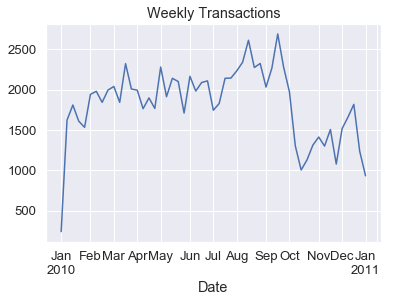

In [202]:
sns.set(font_scale=1.2)
myData.set_index(myData['Date']).resample('w')\
    .count().Cardnum.plot(title = 'Weekly Transactions')

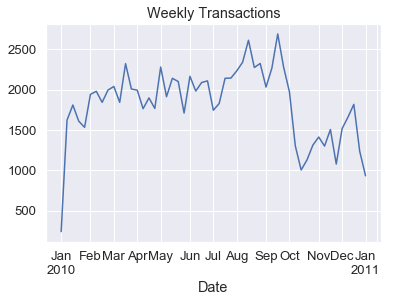

In [203]:
sns.set(font_scale=1.2)
myData.set_index(myData['Date']).resample('w')\
    .count().Transtype.plot(title = 'Weekly Transactions')

# Merchnum

In [30]:
attribute = 'Merchnum'

In [30]:
myData[attribute].describe()

count            93378
unique           13091
top       930090121224
freq              9310
Name: Merchnum, dtype: object

In [31]:
myData[attribute].isnull().sum()

3375

In [32]:
myData[myData[attribute] == 0].shape

(0, 10)

In [33]:
len(myData[attribute].unique())

13092

In [34]:
myData[attribute].value_counts()

930090121224     9310
5509006296254    2131
9900020006406    1714
602608969534     1092
4353000719908    1020
410000971343      982
9918000409955     956
5725000466504     872
9108234610000     817
602608969138      783
4503082476300     746
2094206450000     590
4063000739258     568
2094330000009     533
6920602000804     523
8834000695412     478
4591200814444     463
602608969284      442
9900000037306     435
6859858914649     432
806967335334      431
2603800006005     419
6170666166        392
7725000069608     362
809946579333      345
9108234610006     343
602608964157      309
08-0963129334     307
9108347680000     286
9900000036906     285
                 ... 
661400440           1
7534660094797       1
8100060608990       1
35068162331         1
9983030046945       1
89200041625         1
5900000064394       1
08-3500849290       1
3900056430063       1
4620000593057       1
5600900002129       1
65065060339         1
8986000209459       1
8730008044500       1
5071300010

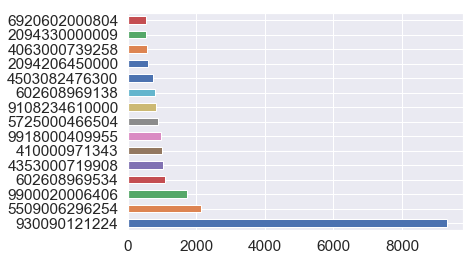

In [32]:
sns.set(font_scale=1.4)
myData[attribute].value_counts().head(15).plot(kind = 'barh')
#plt.yscale()
#plt.xscale('log')
plt.savefig('hist.png')

# Merch description

In [33]:
attribute = 'Merch description'

In [213]:
myData[attribute].describe()

count           96753
unique          13126
top       GSA-FSS-ADV
freq             1688
Name: Merch description, dtype: object

In [214]:
myData[attribute].isnull().sum()

0

In [215]:
myData[myData[attribute] == 0].shape

(0, 10)

In [216]:
myData[attribute].value_counts()

GSA-FSS-ADV                  1688
SIGMA-ALDRICH                1635
STAPLES #941                 1174
FISHER SCI ATL               1093
MWI*MICRO WAREHOUSE           958
CDW*GOVERNMENT INC            872
DELL MARKETING L.P.           816
FISHER SCI CHI                783
AMAZON.COM  *SUPERSTOR        750
OFFICE DEPOT #1082            748
VWR SCIENTIFIC PROD VCTS      688
PC *PC CONNECTION             570
C & C PRODUCT SERVICES        558
BUY.COM                       481
FISHER SCI HUS                442
GSA/CUST SUPPLY CTR 97        435
LAB SAFETY SUPPLY, INC        431
PROFESS OFC ENTERPRISES       421
FRANKLIN COVEY COMPANY        418
STAPLES NATIONAL #471         417
GLOBAL COMPUTER SUPPLY        410
A DAIGER AND CO INC           392
RETAIL CREDIT ADJUSTMENT      383
GOVERNMENT SCIENTIFIC SOU     362
LABSOURCE INC                 346
COLE PARMER INSTRUMENT        341
MC MASTER CARR SUPP           311
GTSI                          309
RETAIL DEBIT ADJUSTMENT       308
THE LIGHTHOUSE

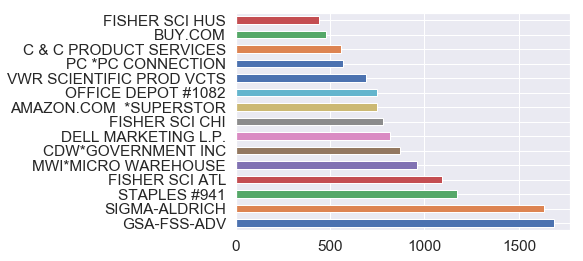

In [34]:
sns.set(font_scale=1.4)
myData[attribute].value_counts().head(15).plot(kind = 'barh')
#plt.yscale()
#plt.xscale('log')
plt.savefig('hist.png')

# Merch state

In [35]:
attribute = 'Merch state'

In [219]:
myData[attribute].describe()

count     95558
unique      227
top          TN
freq      12035
Name: Merch state, dtype: object

In [220]:
myData[attribute].isnull().sum()

1195

In [221]:
myData[myData[attribute] == 0].shape

(0, 10)

In [222]:
myData[attribute].value_counts()

TN     12035
VA      7872
CA      6817
IL      6508
MD      5398
GA      5025
PA      4899
NJ      3912
TX      3790
NC      3322
WA      3300
DC      3208
OH      3131
NY      2430
MO      2420
FL      2143
MA      2081
MI      2033
CO      1987
OR      1510
KS      1236
WI       953
CT       952
MN       939
UT       939
NH       908
NV       726
KY       520
RI       467
OK       411
       ...  
788        1
827        1
795        1
167        1
971        1
245        1
952        1
334        1
656        1
486        1
108        1
625        1
269        1
846        1
051        1
865        1
654        1
505        1
544        1
776        1
489        1
525        1
499        1
168        1
423        1
116        1
052        1
189        1
US         1
820        1
Name: Merch state, Length: 227, dtype: int64

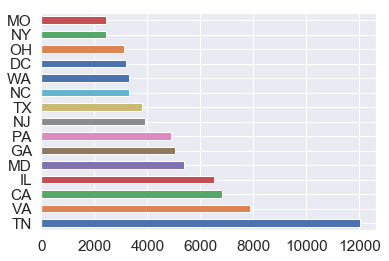

In [36]:
sns.set(font_scale=1.4)
myData[attribute].value_counts().head(15).plot(kind = 'barh')
#plt.yscale()
#plt.xscale('log')
plt.savefig('hist.png')

# Merch zip

In [37]:
attribute = 'Merch zip'

In [224]:
myData[attribute].describe()

count    92097.000000
mean     44706.596740
std      28369.537945
min          1.000000
25%      20855.000000
50%      38118.000000
75%      63103.000000
max      99999.000000
Name: Merch zip, dtype: float64

In [225]:
myData[attribute].isnull().sum()

4656

In [226]:
myData[myData[attribute] == 0].shape

(0, 10)

In [227]:
len(myData[attribute].unique())

4568

In [228]:
myData[attribute].value_counts()

38118.0    11868
63103.0     1650
8701.0      1267
22202.0     1250
60061.0     1221
98101.0     1197
17201.0     1180
30091.0     1092
60143.0      942
60069.0      826
78682.0      817
19380.0      769
20763.0      749
20005.0      648
20748.0      592
20151.0      588
22182.0      583
97213.0      578
22304.0      563
92656.0      552
20036.0      522
84119.0      513
22150.0      501
77251.0      487
19103.0      477
53546.0      432
7606.0       419
22314.0      400
60610.0      373
27707.0      362
           ...  
56308.0        1
90405.0        1
7072.0         1
45217.0        1
18515.0        1
74084.0        1
74101.0        1
74103.0        1
74107.0        1
74115.0        1
37064.0        1
74133.0        1
74135.0        1
48824.0        1
5661.0         1
37205.0        1
6810.0         1
44073.0        1
37130.0        1
15220.0        1
37133.0        1
22664.0        1
37146.0        1
90710.0        1
90712.0        1
90740.0        1
45365.0        1
14604.0       

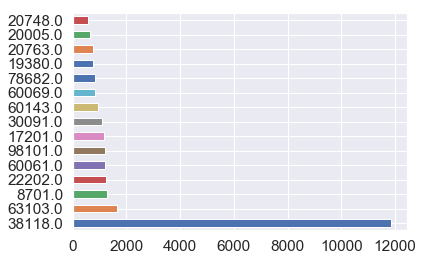

In [38]:
sns.set(font_scale=1.4)
myData[attribute].value_counts().head(15).plot(kind = 'barh')
#plt.yscale()
#plt.xscale('log')""
plt.savefig('hist.png')

# Transtype

In [39]:
attribute = 'Transtype'

In [231]:
myData[attribute].describe()

count     96753
unique        4
top           P
freq      96398
Name: Transtype, dtype: object

In [232]:
myData[attribute].isnull().sum()

0

In [233]:
myData[myData[attribute] == 0].shape

(0, 10)

In [235]:
myData[attribute].value_counts()

P    96398
A      181
D      173
Y        1
Name: Transtype, dtype: int64

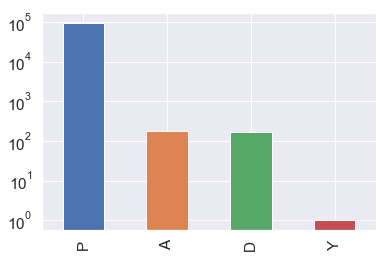

In [42]:
sns.set(font_scale=1.4)
myData[attribute].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')
#plt.xscale('log')""
plt.savefig('hist.png')

# Amount

In [43]:
attribute = 'Amount'

In [237]:
myData[attribute].describe()

count    9.675300e+04
mean     4.278857e+02
std      1.000614e+04
min      1.000000e-02
25%      3.348000e+01
50%      1.379800e+02
75%      4.282000e+02
max      3.102046e+06
Name: Amount, dtype: float64

In [238]:
myData[attribute].isnull().sum()

0

In [239]:
myData[myData[attribute] == 0].shape

(0, 10)

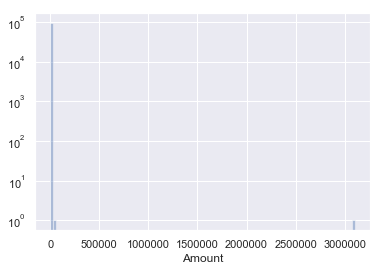

In [45]:
sns.set(font_scale=1.)
temp = myData[myData[attribute] >= 0]
ax = sns.distplot(temp[attribute],bins=100, kde=False)
ax.set_yscale('log')
plt.savefig('log.png')

# Fraud

In [47]:
attribute = 'Fraud'

In [247]:
myData[attribute].describe()

count    96753.000000
mean         0.010945
std          0.104047
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Fraud, dtype: float64

In [248]:
myData[attribute].isnull().sum()

0

In [249]:
myData[myData[attribute] == 0].shape

(95694, 10)

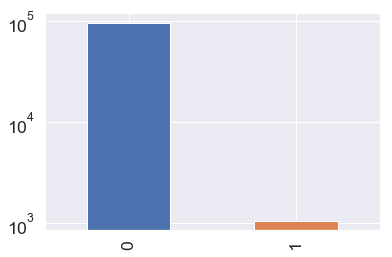

In [49]:
sns.set(font_scale=1.6)
myData[attribute].value_counts().head(20).plot(kind='bar')
plt.yscale('log')
#plt.xscale('log')
plt.savefig('hist.png')

In [73]:
import datetime as dt


In [48]:
test = myData.iloc[1:1000,:].copy()

In [59]:
test = test.set_index('Date')

In [33]:
test.head(5)

,Recnum,Cardnum,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
Date,,,,,,,,,
2010-01-01,2,5142183973,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2010-01-01,3,5142131721,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
2010-01-01,4,5142148452,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
2010-01-01,5,5142190439,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
2010-01-01,6,5142149874,5509006296254,FEDEX SHP 12/22/09 AB#,TN,38118.0,P,3.67,0


In [37]:
test2 = test.groupby(level = 0).count()
test2

,Recnum,Cardnum,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
Date,,,,,,,,,
2010-01-01,50,50,50,50,50,50,50,50,50
2010-01-02,29,29,29,29,29,10,29,29,29
2010-01-03,159,159,153,159,157,153,159,159,159
2010-01-04,229,229,221,229,226,221,229,229,229
2010-01-05,309,309,286,309,299,297,309,309,309
2010-01-06,223,223,215,223,221,217,223,223,223


In [30]:
print(test.index[1])
print(test.index[2])
print(test.index[3])

2010-01-01 00:00:00
2010-01-01 00:00:00
2010-01-01 00:00:00


In [47]:
test.iloc[[1,]].index

DatetimeIndex(['2010-01-01'], dtype='datetime64[ns]', name='Date', freq=None)

In [60]:
test.head(4)

,Recnum,Cardnum,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
Date,,,,,,,,,
2010-01-01,2,5142183973,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2010-01-01,3,5142131721,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
2010-01-01,4,5142148452,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
2010-01-01,5,5142190439,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [65]:
test.loc['01/01/2010',].head(5)

,Recnum,Cardnum,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
Date,,,,,,,,,
2010-01-01,2,5142183973,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2010-01-01,3,5142131721,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
2010-01-01,4,5142148452,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
2010-01-01,5,5142190439,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
2010-01-01,6,5142149874,5509006296254,FEDEX SHP 12/22/09 AB#,TN,38118.0,P,3.67,0


In [114]:
test3 = myData.iloc[1:1000,:].copy()
test3.head(4)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [135]:
test3.iloc[0,2] + dt.timedelta(0.01)


Timestamp('2010-01-01 00:14:24')

In [129]:
a = pd.to_datetime(test3.iloc[0,2] )

In [134]:
a + dt.timedelta(0.01)

Timestamp('2010-01-01 00:14:24')

In [133]:
a + dt.time(1)

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'datetime.time'

In [97]:
dt.datetime(test3.iloc[0,2])

TypeError: an integer is required (got type Timestamp)

In [96]:
test3.iloc[0,2]

Timestamp('2010-01-01 00:00:00')

In [112]:
a = dt.datetime(1, 1, 1, 1, 1)

In [113]:
a.year

1

In [102]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [107]:
longer_ts,

2000-01-01    0.116876
2000-01-02   -0.611297
2000-01-03    0.705364
2000-01-04    0.076446
2000-01-05   -0.330754
2000-01-06   -0.339783
2000-01-07    0.340450
2000-01-08   -0.584648
2000-01-09   -0.199826
2000-01-10   -0.861217
2000-01-11   -0.900983
2000-01-12   -0.540534
2000-01-13   -0.763705
2000-01-14   -0.030900
2000-01-15    1.048319
2000-01-16    0.142022
2000-01-17   -0.543628
2000-01-18   -0.123720
2000-01-19   -0.605488
2000-01-20    0.229189
2000-01-21   -2.116865
2000-01-22   -1.748496
2000-01-23   -0.292980
2000-01-24   -1.880161
2000-01-25   -0.152035
2000-01-26    0.827247
2000-01-27   -1.455199
2000-01-28    0.285154
2000-01-29   -0.331933
2000-01-30   -0.215680
                ...   
2002-08-28    0.137390
2002-08-29   -0.194320
2002-08-30    1.163575
2002-08-31   -0.044908
2002-09-01   -0.885795
2002-09-02    1.139886
2002-09-03    0.709243
2002-09-04    0.556034
2002-09-05   -0.834276
2002-09-06   -0.512215
2002-09-07    0.177301
2002-09-08    0.168580
2002-09-09 